# Timing and Plotting

## Agenda

1. Timing
2. Building a timing utility
3. The `timeit` module
4. Drawing plots with `matplotlib`
5. Timing plots
6. Timing examples
    - list indexing
    - linear search
    - binary search
    - insertion sort
7. Takeaways

## 1. Timing

The [`time`](https://docs.python.org/3/library/time.html#module-time) module contains functions for obtaining and interpreting the current system time.

In [1]:
#accesses time stamps
import time
#within the module run the time module
time.time() # seconds since the "epoch"
#output: represents the current time in  since the "epoch", January 1 1970, but wouldnt trust the output down to the exact precision
#           but it will be locally correct based on your computer

1716472341.5161362

In [2]:
time.time() // (365 * 24 * 60 * 60)
#divide to get number of years, should be 54

54.0

By taking start and stop "timestamps", we can measure the runtime of code:

In [3]:
#sleep function, faking a long task happening, causes it to halt for x number of seconds
start = time.time()
time.sleep(0.5)
#replace with arbitrary algorithm to get the time that takes to run 
#running the algorithm just one time 
#whats the problem with running this here?
#   at that moment something else may have been going that was using CPU, etc etc
#   more trials will give more confidence
#   is the algorithm making the best use of the memory? 
#   If the cache is empty, wont be in the faster form of memory, etc etc, can normalize this over trials
end = time.time()
end-start # note, there is a slight error because it doesnt take into account the amount of time it takes to run the time getting function

#overhead time: time the notebook takes to run 


## 2. Building a timing utility

We can build a utility function for timing the execution of a passed-in function:

In [4]:
#takes a function to execute 
# ideally takes arbitrary chunk of code and times it 
#   can actually due this due to interpretive nature of the language, we have direct access via eval 
def timeit(fn):
    start = time.time()
    fn()
    end = time.time()
    return end - start

In [5]:
sum(range(10_000))

49995000

In [10]:
timeit(lambda: sum(range(10_000)))

9.1552734375e-05

While using a lambda is one possible approach, it limits us to passing in a function that must be called a certain way (e.g., with no arguments). We can make use of the `eval` function to evaluate an arbitrary string of Python code instead.

In [11]:
#takes python code as a string and runs it 
eval('1 + 2')

3

In [12]:
eval('sum(range(10_000))')

49995000

In [13]:
#timeit now takes a statement 
def timeit(stmt='pass'):
    start = time.time()
    eval(stmt)
    end = time.time()
    return end - start

In [17]:
#downside: overhead of interpreter over the code, but it should be consistent so thats okay, we are interpreting this into the code 
timeit('sum(range(10_000))')

0.00011229515075683594

To make timings more stable, we can run the passed-in function multiple times:

In [21]:
#add in a number of times we want to run it 
def timeit(stmt='pass', number=1):
    total_time = 0
    for _ in range(number):
        start = time.time()
        eval(stmt)
        end = time.time()
        total_time += end - start
    return total_time

In [28]:
timeit('sum(range(100_000))', number=1000)

0.910067081451416

## 3. The `timeit` module

The [`timeit`](https://docs.python.org/3/library/timeit.html) module is a built-in library for measuring the execution of code passed in as a string.

In [29]:
import timeit
#exposes timeit function, takes string of code snippet, and number of times to execute, and returns time to execute 
#semicolons can be used in the string to seperate statements
timeit.timeit('sum(range(10_000))', number=1000)

0.09592796899960376

It also supports passing in "setup" code that is not timed.

In [30]:
#setup argument: passes in code that intitializes something that the code needs, gets run but its time doesnt matter 
timeit.timeit('sum(r)', 
              setup='r = range(100_000)', #this is setting up the input 
              number=1000)

1.2056322360003833

We can easily use this to gather timings for multiple input values:

In [31]:
#same time it invocation, but instead of a fixed value use interpolated value n 
#timeit is the generating expression in this list comprehension 
[timeit.timeit('sum(r)',
               setup=f'r = range({n})',
               number=1000)
 for n in range(1000, 11_000, 1000)]
#trend: values increase, it takes longer to sum bigger ranges, not shocking 

[0.008552642015274614,
 0.02144538500579074,
 0.0256510229955893,
 0.046291595994262025,
 0.04137137997895479,
 0.05203352798707783,
 0.060721328016370535,
 0.06850546301575378,
 0.07621282699983567,
 0.08588477998273447]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

In [33]:
#recursive implementation of fib seqs
#horribly inefficient implementation as a note
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [36]:
globals()
#dictionary of everything defined in a notebook as a map from the code to what it evaluates to 
# fib: its a function 

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import time\ntime.time() # seconds since the "epoch"',
  'time.time() // (365 * 24 * 60 * 60)',
  '#sleep function, faking a long task happening, causes it to halt for x number of seconds\ntime.sleep(0.5)',
  '#takes a function to execute \ndef timeit(fn):\n    start = time.time()\n    fn()\n    end = time.time()\n    return end - start',
  'sum(range(10_000))',
  'timeit(sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  'timeit(lambda: sum(range(10_000)))',
  "#takes python code as a string and runs it \neval('1 + 2')",
  "eval('sum(range(10_000))')",
  "#timeit now takes a statement \ndef timeit(stmt='pass'):\n    st

In [34]:
[fib(n) for n in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [35]:
#list comprehension, want to call with fib{n}
#   run it 1000 times
#   need to tell timeit that the function is defined in this notebook, use optional params globals to get the timer module access 
#   you can also put an import statement of import fib; ... into your eval string 

[timeit.timeit(f'fib({n})',
               number=1000,
               globals=globals()) # "globals()" returns a dict of everything
                                  # defined in this module
 for n in range(1, 15)]

[9.81530174612999e-05,
 0.0002869210147764534,
 0.0004913430020678788,
 0.0011000180093105882,
 0.002332729985937476,
 0.0027235430025029927,
 0.004725435021100566,
 0.007376815017778426,
 0.011892969982000068,
 0.01858641201397404,
 0.030407789017772302,
 0.04908408198389225,
 0.07919882598798722,
 0.12839346900000237]

### Magic timing commands

The `%timeit` "magic" notebook command can also be used to time code (though not always as conveniently as the `timeit` module).

In [38]:
#magic: not part of python but built into the notebook system 
#       kind of a moot point because you see the timing result is always shown at the bottom
%timeit -n 1000 sum(range(10_000))

108 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
%%timeit -n 1000
#times everything in this code block, runs its 1000 times

total = 0
for n in range(10_000):
    total += n

#see built in sum function is much better, probably built in c code and implemented natively 

322 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 4. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [43]:
#submodule for our plotting library
import matplotlib.pyplot as plt
#numerical processing library, arrays, matrices, ranges of sequences of floating points, etc 
import numpy as np
import math

#optional line: setting a default params for all plots 
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

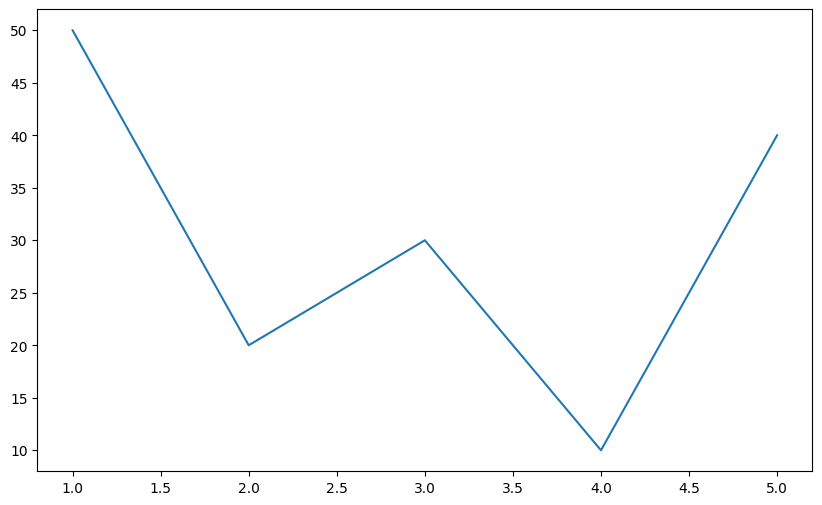

In [44]:
#takes two sequences that usually match in length, 1st is x axis, 2nd is y axis 
plt.plot([1, 2, 3, 4, 5],        # x-axis vals
         [50, 20, 30, 10, 40]);  # y-axis vals

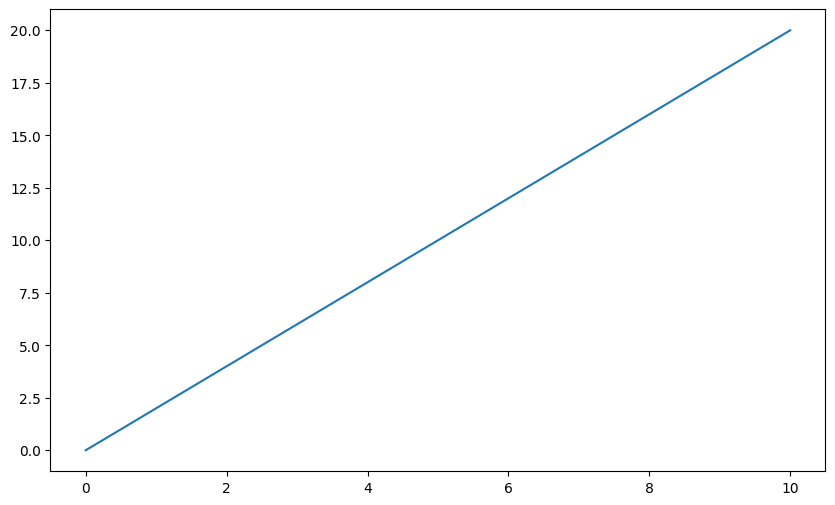

In [46]:
xs = range(11)
#just doubling x 
ys = [x*2 for x in xs]
plt.plot(xs, ys); #semicolon here to avoid giving a return value, do the plotting but dont return the plot itself 

We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**
 
  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `g` : blue
  - `b` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

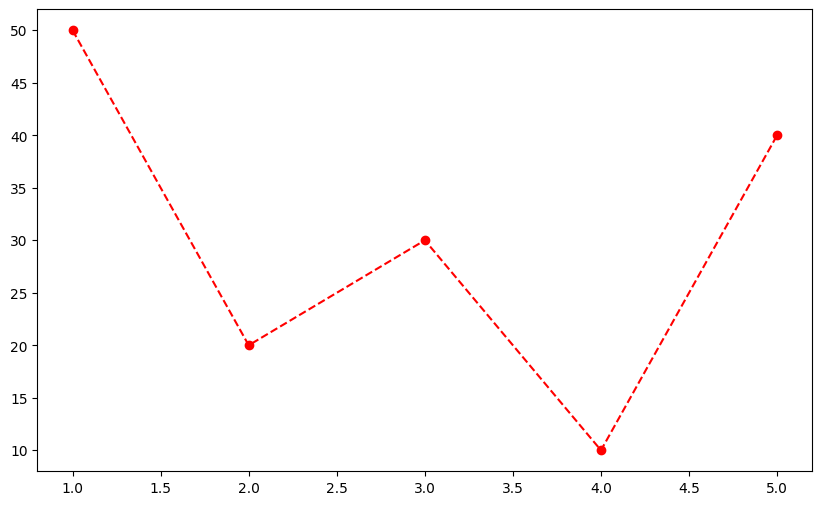

In [47]:

plt.plot([1, 2, 3, 4, 5], 
         [50, 20, 30, 10, 40], 
         'o--r');

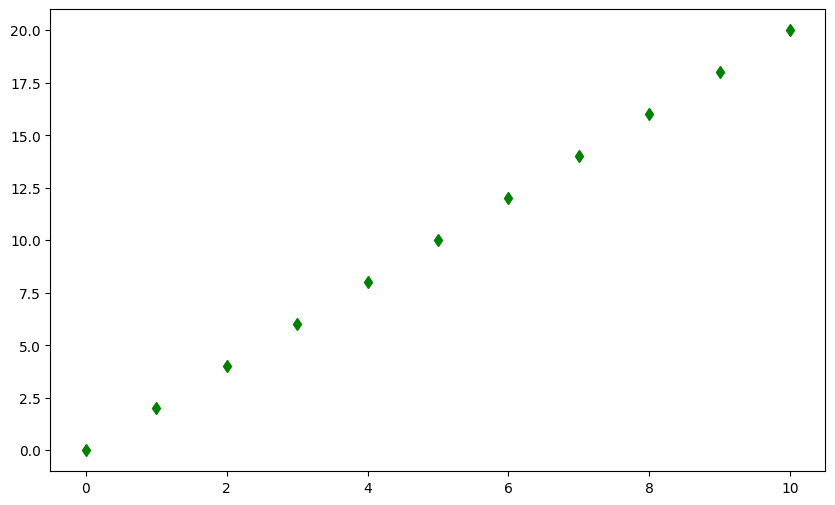

In [48]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [49]:
#timing functions that take just integer values, so we would just pass in a range 
#   but ranges arent as granular and specific
#   example: if we have start and end we cant quickly get the steps we need to do that in n steps
#numpy has different range types
#   arange has floating points 
#   returns an array NOT A LIST: efficient implementation of sequentially organized data 
np.arange(0.5, 2.5, 0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [52]:
#linspace
#   instead of step as last argument, tell me how many values to return 
np.linspace(10, 20, 41)

array([  10.  ,   59.75,  109.5 ,  159.25,  209.  ,  258.75,  308.5 ,
        358.25,  408.  ,  457.75,  507.5 ,  557.25,  607.  ,  656.75,
        706.5 ,  756.25,  806.  ,  855.75,  905.5 ,  955.25, 1005.  ,
       1054.75, 1104.5 , 1154.25, 1204.  , 1253.75, 1303.5 , 1353.25,
       1403.  , 1452.75, 1502.5 , 1552.25, 1602.  , 1651.75, 1701.5 ,
       1751.25, 1801.  , 1850.75, 1900.5 , 1950.25, 2000.  ])

In [55]:
#when we dont care about precision
np.linspace(1, 100_000, 50, dtype=int) # we can specify the data type 
                                       # to coerce values into integers

array([     1,   2041,   4082,   6123,   8164,  10204,  12245,  14286,
        16327,  18368,  20408,  22449,  24490,  26531,  28572,  30612,
        32653,  34694,  36735,  38776,  40816,  42857,  44898,  46939,
        48980,  51020,  53061,  55102,  57143,  59184,  61224,  63265,
        65306,  67347,  69388,  71428,  73469,  75510,  77551,  79592,
        81632,  83673,  85714,  87755,  89796,  91836,  93877,  95918,
        97959, 100000])

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval: 

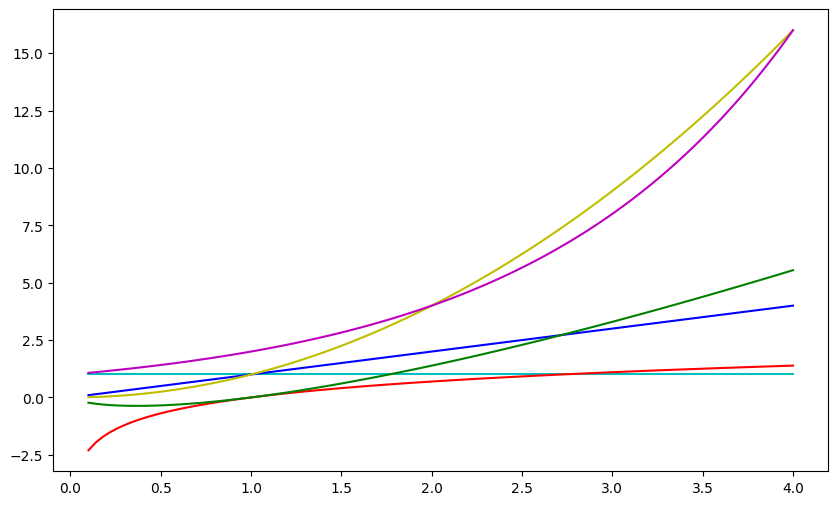

In [56]:
#standard lists of ordered growths 
#drawing multiple plots to compare trends 
count = 100
#x axis 
xs = np.linspace(0.1, 4, count)
#different dependent collections
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
#xlogx
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');



## 5. Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

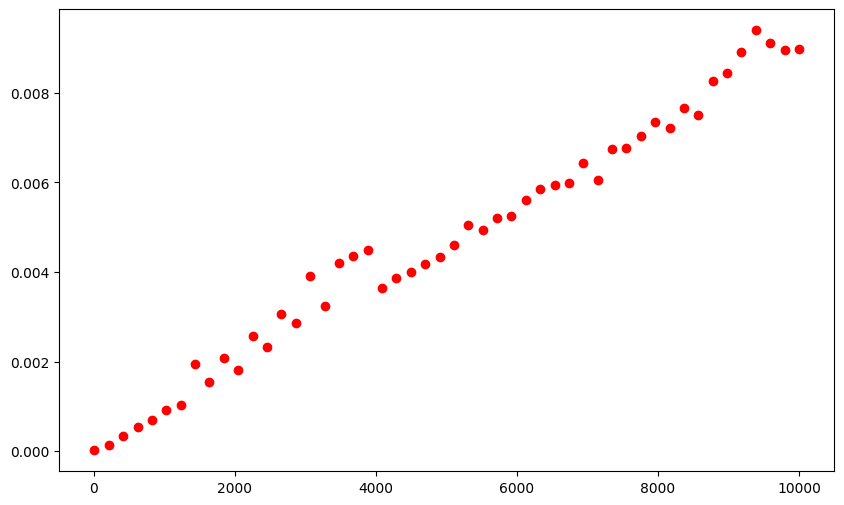

In [58]:
# runtimes for sum for increasing sizes of input
# using linspace as our range, 10, 10K with 50 values uniformly distributed 
ns = np.linspace(10, 10_000, 50, dtype=int)
ts = [timeit.timeit(f'sum(range({n}))', 
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');
#theres a linear relationship between the size of the input and the time it takes to sum it, directly proportional, linear factor 

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on. 

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [59]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # slope = rise / run 
    
avg_slope = total / (len(ns)-1)

In [60]:
avg_slope

8.979578213989399e-07

It should make sense that for our bounding linear functions, we simply need to pick $c_1$ < slope, and $c_2$ > slope. To be safe, we use the multipliers 0.8 and 1.2 in our plot below (we also plot the line using the unaltered slope for good measure):

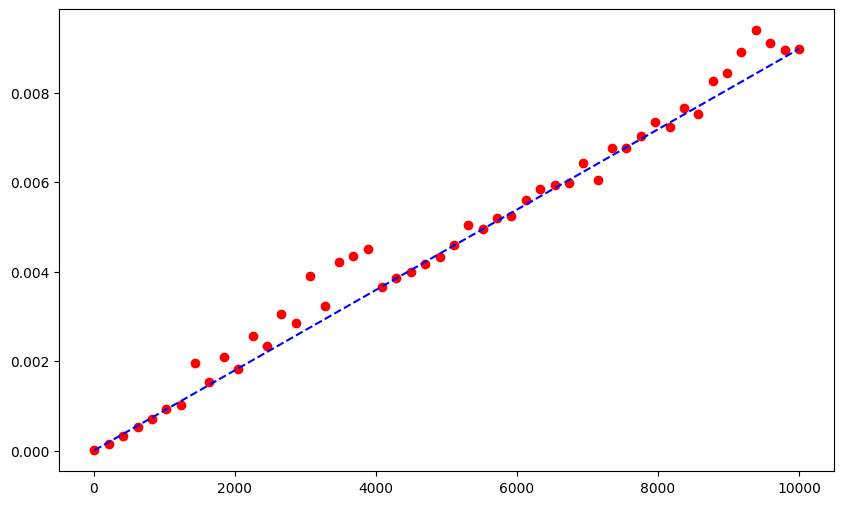

In [61]:
plt.plot(ns, ts, 'or')
#formula for predicting how long my input will run based on n 
#now this doesnt necesarrily scale perfectly, consider hardware optimization, caches, etc 
plt.plot(ns, [avg_slope*n for n in ns], '--b');

In [62]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print(f'Runtime of sum(range({n:>11,})) ~ {avg_slope * n / 100:>5.2f} s')

Runtime of sum(range(          1)) ~  0.00 s
Runtime of sum(range( 10,000,000)) ~  0.09 s
Runtime of sum(range( 20,000,000)) ~  0.18 s
Runtime of sum(range( 30,000,000)) ~  0.27 s
Runtime of sum(range( 40,000,000)) ~  0.36 s
Runtime of sum(range( 50,000,000)) ~  0.45 s
Runtime of sum(range( 60,000,000)) ~  0.54 s
Runtime of sum(range( 70,000,000)) ~  0.63 s
Runtime of sum(range( 80,000,000)) ~  0.72 s
Runtime of sum(range( 90,000,000)) ~  0.81 s
Runtime of sum(range(100,000,000)) ~  0.90 s


We can also use [`polyfit`](https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html) to compute a best-fitting polynomial function of arbitrary degree for our data:

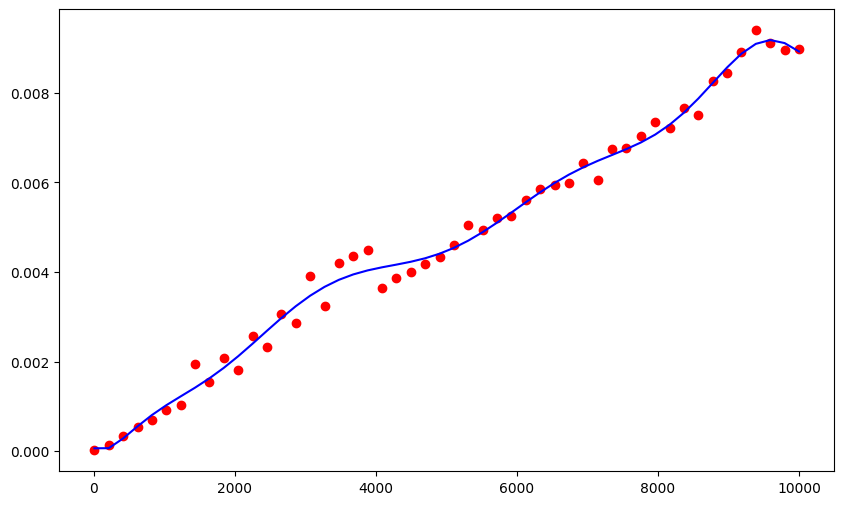

In [66]:
#degrees of freedom 
degree = 10
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'or')
plt.plot(ns, [p(n) for n in ns], '-b');

Is there a downside to this approach?

In [67]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print(f'Runtime of sum(range({n:>11,})) ~ {p(n)/100:.2f} s')

Runtime of sum(range(          1)) ~ 0.00 s
Runtime of sum(range( 10,000,000)) ~ 547788458967143391482311868416.00 s
Runtime of sum(range( 20,000,000)) ~ 562359118638493520303967996739584.00 s
Runtime of sum(range( 30,000,000)) ~ 32455866267791006618122277468766208.00 s
Runtime of sum(range( 40,000,000)) ~ 576585862876933221073860517248892928.00 s
Runtime of sum(range( 50,000,000)) ~ 5371235141730027748545611981305937920.00 s
Runtime of sum(range( 60,000,000)) ~ 33262890566182795308229266970691764224.00 s
Runtime of sum(range( 70,000,000)) ~ 155410473260793441078522486752538525696.00 s
Runtime of sum(range( 80,000,000)) ~ 590798048184777908084970682121111732224.00 s
Runtime of sum(range( 90,000,000)) ~ 1918645953024361914925417889732071784448.00 s
Runtime of sum(range(100,000,000)) ~ 5502932678421443630110972269337140789248.00 s


Choosing an ill-fitting function may result in wildly inaccurate runtime predictions. Worse, inaccuracies are compounded as input sizes grow large!

How do we know what class of function to use (e.g., logarithmic, linear, nth-degree polynomial, exponential) for modeling the runtime behavior of algorithms? 

Can we reliably determine this through empirical observation?

## 6. Timing Examples

### Built-in list indexing

What is the runtime behavior of list-indexing?

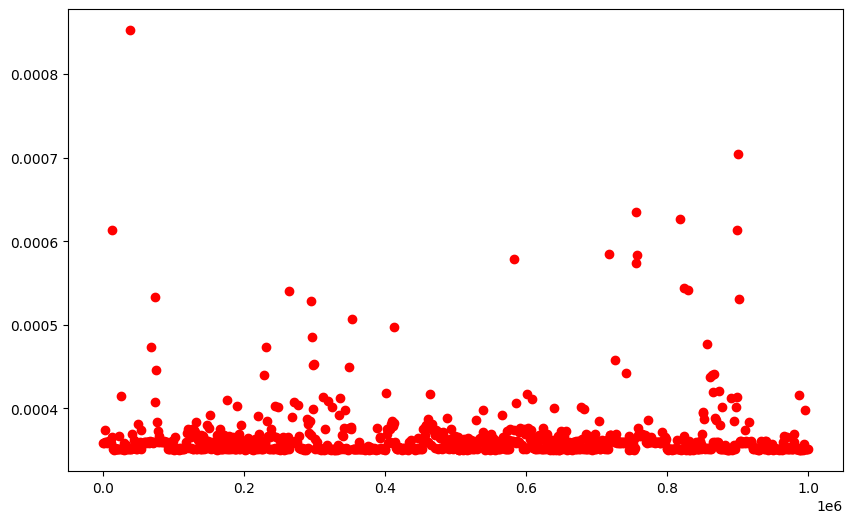

In [76]:
#runtime for indexing into a list 
#create a list of one mil values, values dont matter 
lst = list(range(1_000_000))
#create a linspace from 0-length of list, and getting 1000 uniformly distributed indexes we will be accessing 
#     this is our independent access
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int)
#timing of lst[n], so to read a value from the list index, and putting it somewhere, here we are using _ to denote a throwaway variable 
#     repeat each index access 10,000 times 
#     result is the time 
ts = [timeit.timeit(f'_ = lst[{n}]',
                    globals=globals(), 
                    number=10000) 
      for n in ns]

plt.plot(ns, ts, 'or');

#memory is byte address accessible, you just jump directly to it 

Observation: accessing an element in a list by index -- *regardless of where in the list the element is located* -- takes a uniform/constant amount of time.

How? **A Python list uses an array as its backing data store.** Every "slot" in this array is a reference (i.e., a fixed-width address) to an object, and to access an element at a particular index, the underlying code:

1. Computes an *offset* into the array by multiplying the index by the size of a reference
2. Adds the computed offset to the *base address* of the array, giving us the address of the reference
3. Accesses the reference and uses it to load the associated element

Each of the steps above can be performed in constant time.

![](../images/array-indexing.jpg)

### Linear Search

What is the runtime behavior of searching for an element in an unsorted list?

In [77]:
def contains(lst, x):
    for item in lst:
        if item == x:
            return True
    #only if for loop doesnt break early with return true 
    else:
        return False

In [80]:
import random
lst = list(range(100))
random.shuffle(lst)

contains(lst, 10)

True

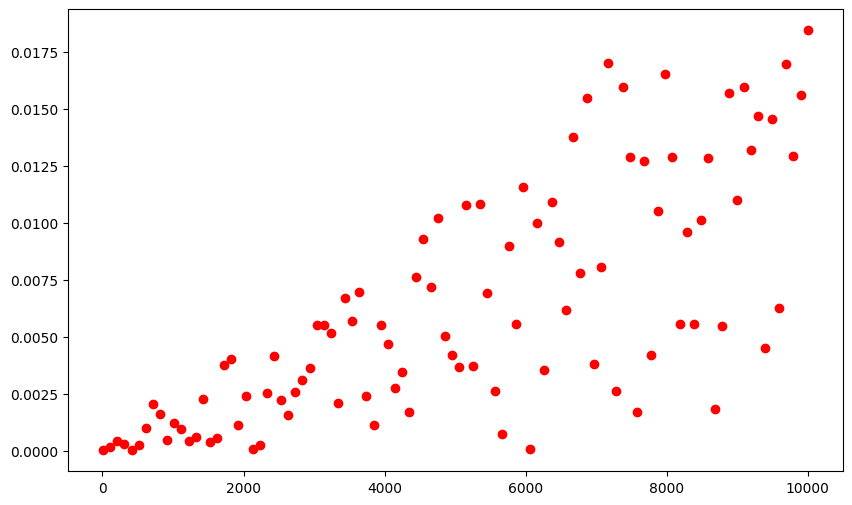

In [83]:
# runtimes when searching for a present element in a randomly shuffled list

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup=f'lst=list(range({n})); random.shuffle(lst)',
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');
# lists are randomly shuffled, as the list size gets bigger 
# want to design to hit worst case scenario 


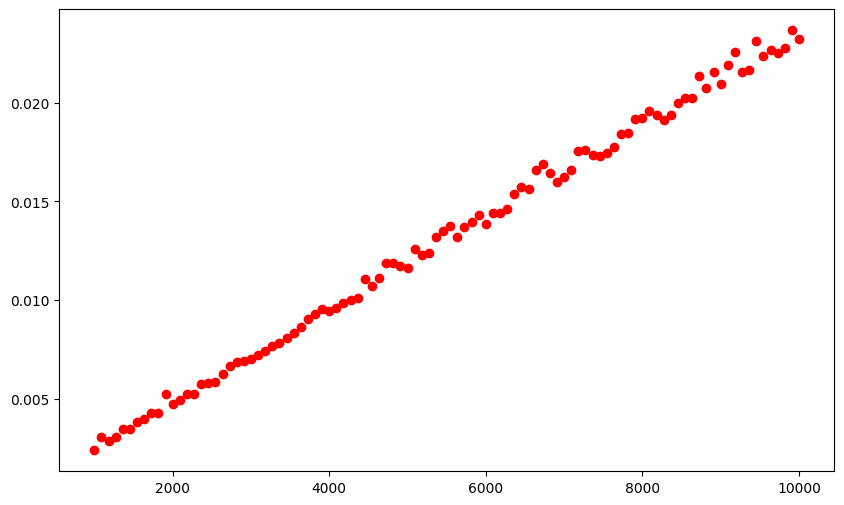

In [85]:
# runtimes when searching for an element that is not present
# worst case scenario 

ns = np.linspace(1_000, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, -1)', 
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

### Binary search

What is the runtime behavior of searching for an element in a sorted list using binary search?

In [93]:
def contains(lst, x):
    low = 0
    high = len(lst) -1
    mid = 0
    while low <= high:
        mid = (high + low) // 2
        if lst[mid] == x:
            return True
        elif lst[mid] < x:
            low = mid - 1
        elif lst[mid] > x:
            high = mid + 1 
    return False


In [94]:
lst = list(range(1000))
contains(lst, 10)

True

In [95]:
# runtimes when searching for different values in a fixed-size list

lst = list(range(100))
ns = range(100)
ts = [timeit.timeit(stmt=f'contains(lst, {x})', 
                    globals=globals(), 
                    number=100)
      for x in range(1000)]

plt.plot(ns, ts, 'or');

KeyboardInterrupt: 

In [92]:
# runtimes when searching for an edge-value in lists of increasing size
# either end of the list, we will get worst case, could also just look for those that dont exist

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

KeyboardInterrupt: 

### Insertion sort

What is the runtime behavior of insertion sort?

In [96]:
#sort algo: consider hand sorting. Take one card as the start, already sorted
#               take unsorted part and sort accordingly
def insertion_sort(lst):
    #unsorted portion of the list
    for i in range(1, len(lst)):
        for j in range(i,0,-1):
            if lst[j] < lst[j-1]:
                lst[j], lst[j-1] = lst[j-1], lst[j]
            else:
                #the rest is already sorted, just stop 
                break



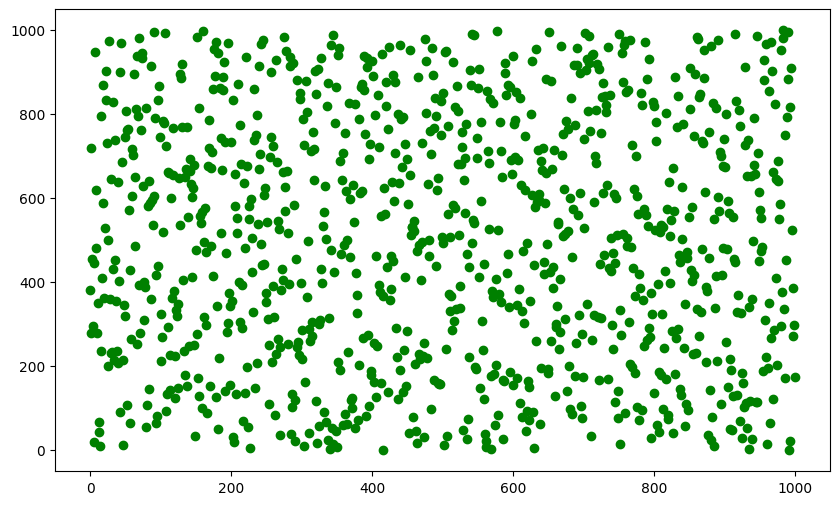

In [97]:
import random
lst = list(range(1000))
random.shuffle(lst)
plt.plot(lst, 'og');

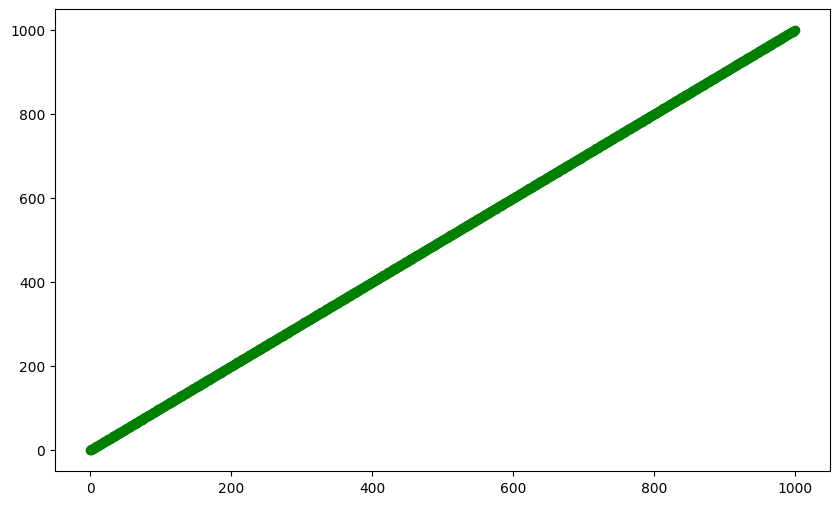

In [98]:
insertion_sort(lst)
plt.plot(lst, 'og');

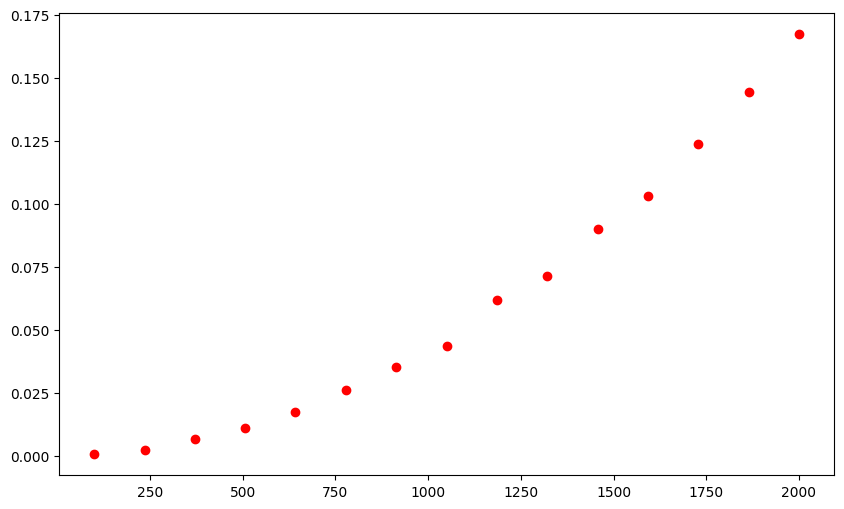

In [99]:
# runtimes for a randomized list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    #create a list from 100-2000, 15 values within that 
                    setup=f'lst=list(range({n})); random.shuffle(lst)',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

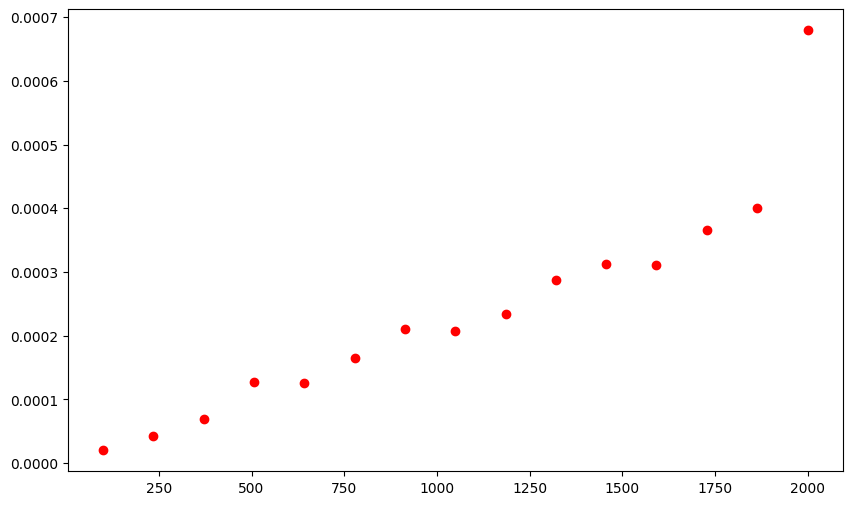

In [100]:
# runtimes for an already sorted list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup=f'lst=list(range({n}))',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

#if you get rid of break, notice it looks exactly the same
#   makes sense because you now still have to traverse through everything 
#   to check if its sorted 

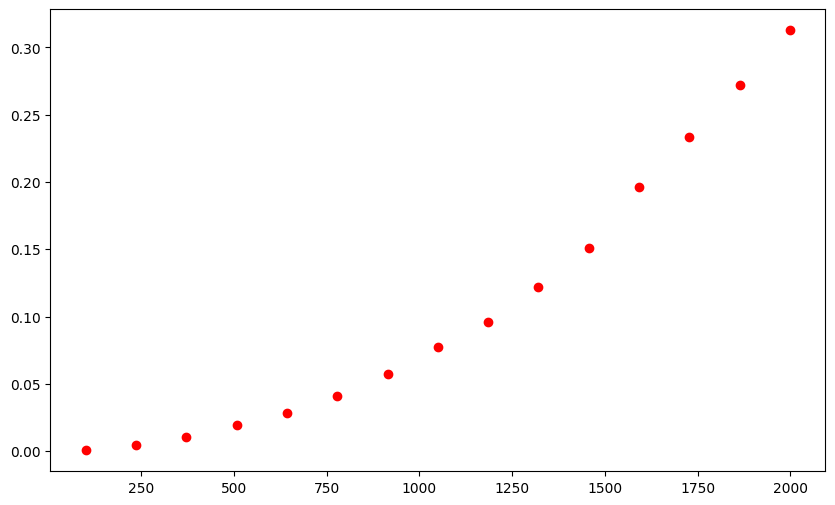

In [101]:
# runtimes for a reversed list

ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup=f'lst=list(reversed(range({n})))',
                    globals=globals(),
                    number=1)
         for n in ns]

plt.plot(ns, ts, 'or');

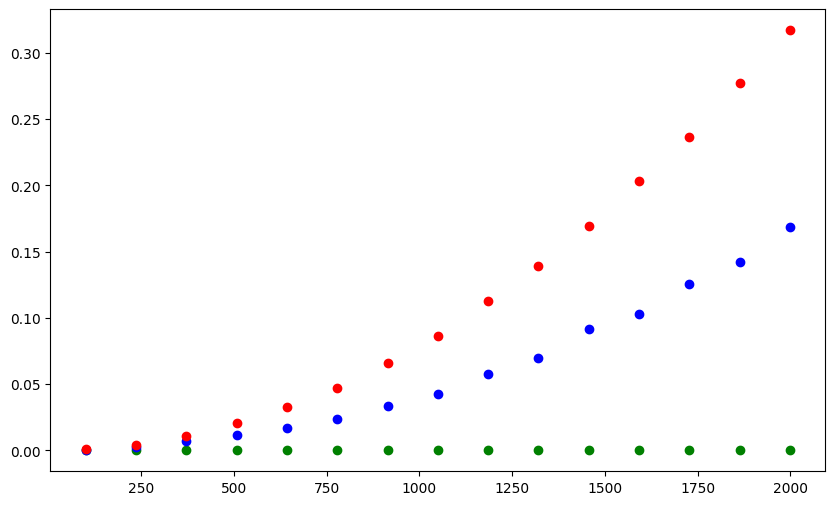

In [102]:
# above runtimes superimposed

ns = np.linspace(100, 2000, 15, dtype=int)
ts1 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list((range({n})))',
                     globals=globals(),
                     number=1)
       for n in ns]
ts2 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list(range({n})); random.shuffle(lst)',
                     globals=globals(),
                     number=1)
       for n in ns]

ts3 = [timeit.timeit('insertion_sort(lst)',
                     setup=f'lst=list(reversed(range({n})))',
                     globals=globals(),
                     number=1)
       for n in ns]

plt.plot(ns, ts1, 'og');
plt.plot(ns, ts2, 'ob');
plt.plot(ns, ts3, 'or');

## 7. Takeaways

- timing and plotting libraries allow us to systematically measure and visualize the runtime behavior of algorithms over different inputs
- different characteristics of input (e.g., shuffled, ordered, reversed) can have a profound impact on the runtime of algorithms
    - gets at best case, worst case, average, etc 
- empirical runtime measurements do not always paint a clear, accurate, or consistent picture of the long-term runtime behavior of a function
- choosing the wrong class of function to describe the runtime behavior of an algorithm can result in disastrously wrong predictions
    - example: overfitting data 
- timing results are useful, but we need a more systematic and rigorous way of describing and comparing the runtime behavior of algorithms!